In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
# da tiempos de entrenamiento, prediccion
from sklearn.model_selection import cross_validate
# modelo kneighbors
from sklearn.neighbors import KNeighborsRegressor
# importar curva de validacion
from sklearn.model_selection import validation_curve
# curva de aprendizaje
from sklearn.model_selection import learning_curve 

In [3]:
x = pd.read_csv('x_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y, random_state = 1)

In [5]:
pd.DataFrame.equals(x_train, x2_train)

True

In [6]:
scores = cross_val_score(Lasso(), x, y, cv=5, scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [7]:
scores.mean()

0.44964021745791777

In [8]:
Lasso().fit(x_train, y_train).score(x_test, y_test)

0.7926190294963362

# Seleccion de modelos

In [9]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\kz\anaconda3\lib\site-packages (0.22.2.post1)


In [10]:
results = cross_validate(Lasso(), x, y, return_train_score=True, cv=5)
results

{'fit_time': array([0.02600074, 0.02800417, 0.00399923, 0.02300119, 0.0240047 ]),
 'score_time': array([0.00200176, 0.00099897, 0.00100517, 0.00100064, 0.00100064]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [11]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039036
0.44964021745791777


## Validation curves and Learning curves

In [12]:
cross_validate(KNeighborsRegressor(), x, y, return_train_score=True, cv=5)

{'fit_time': array([0.00700021, 0.00600052, 0.0059998 , 0.00500035, 0.00499916]),
 'score_time': array([0.00400138, 0.00399947, 0.00500107, 0.00400138, 0.00400043]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

In [13]:
cross_validate(KNeighborsRegressor(n_neighbors=10), x, y, return_train_score=True, cv=5)

{'fit_time': array([0.00699949, 0.0089972 , 0.00499678, 0.00699687, 0.00599957]),
 'score_time': array([0.00400209, 0.00499964, 0.00700092, 0.00600338, 0.0090034 ]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

In [14]:
n = np.arange(2, 50, 2)
train_scores, test_scores = validation_curve(KNeighborsRegressor(), x, y, param_name='n_neighbors', param_range=n,cv=5)
np.mean(train_scores, axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

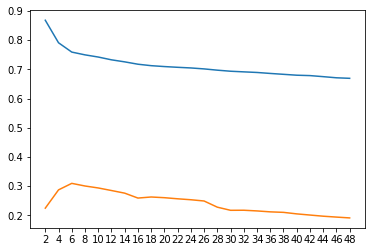

In [15]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24), n);

In [17]:
# observar si el modelo esta aprendiendo
samples, train, test = learning_curve(KNeighborsRegressor(n_neighbors=6), x, y, cv=5)

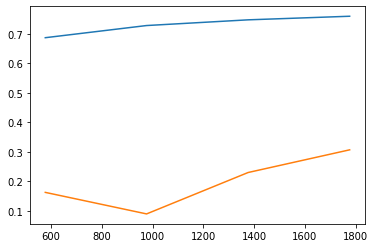

In [20]:
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
# curva verde esta aprendiendo o no
plt.plot(samples[1:], np.mean(test, axis=1)[1:])
# cuando hay una asintota el modelo ya no aprende